In [8]:
from __future__ import print_function, division, unicode_literals

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = \
    mnist.load_data()
training_images, test_images = training_images/255.0, test_images/255.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(training_images, training_labels, epochs=5, verbose=1)
test_lost = model.evaluate(test_images, test_labels,  verbose=0)
print(test_lost)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5011 - accuracy: 0.8234
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3746 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3379 - accuracy: 0.8778
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3122 - accuracy: 0.8852
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2936 - accuracy: 0.8922
[0.3482714383840561, 0.8756]


In [13]:
(training_images, training_labels), (test_images, test_labels) = \
    mnist.load_data()
training_images = training_images.reshape(60000, 28, 28, 1)/255.0
test_images = test_images.reshape(10000, 28, 28, 1)/255.0
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_lost = model.evaluate(test_images, test_labels, verbose=0)
print(test_lost)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [14]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


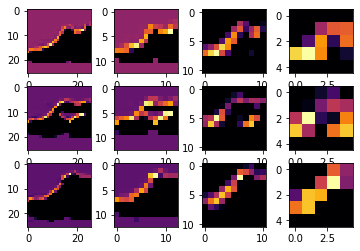

In [22]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(
    inputs=model.input, outputs=layer_outputs)
for x in range(4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [23]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_lost = model.evaluate(test_images, test_labels, callbacks=[callbacks], verbose=0)
print(test_lost)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [26]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(test_loss, test_acc)

2.0.0
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 428us/sample - loss: 0.1555 - accuracy: 0.9539
Epoch 2/10
60000/60000 [==============================] - 29s 486us/sample - loss: 0.0518 - accuracy: 0.9842
Epoch 3/10
60000/60000 [==============================] - 25s 410us/sample - loss: 0.0337 - accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0213 - accuracy: 0.9933
Epoch 5/10
60000/60000 [==============================] - 22s 371us/sample - loss: 0.0148 - accuracy: 0.9953
Epoch 6/10
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0105 - accuracy: 0.9968
Epoch 7/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.0079 - accuracy: 0.9974
Epoch 8/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.0059 - accuracy: 0.9980
Epoch 9/10
60000/60000 [==============================] - 28s 464us/sample - loss: 0.0053 - accurac